# Proyek Machine Learning - Mushroom Classification

---




# Data Diri

- Nama : Arip Kristiyanto
- Jenis Kelamin : Laki-Laki
- Institusi : Universitas Pamulang

# Importing Library

In [1]:
# Meng-import semua library yang digunakan
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno
import warnings
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

# Importing Dataset

In [2]:
# Install kaggle package
!pip install kaggle

# Upload kaggle.json yang didapatkan dari akun Kaggle
from google.colab import files
files.upload()  # Pilih file kaggle.json

Saving kaggle(1).json to kaggle(1).json


{'kaggle(1).json': b'{"username":"aripkristiyanto","key":"5470d71d066579d80a509c73c4265ca0"}'}

In [4]:
# Buat direktori dan ubah izin file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d prishasawhney/mushroom-dataset

# Unzip dataset dan hapus file zip
!unzip mushroom-dataset.zip && mushroom-dataset.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset
License(s): other
100% 602k/602k [00:00<00:00, 1.02MB/s]
100% 602k/602k [00:00<00:00, 1.02MB/s]
Archive:  mushroom-dataset.zip
  inflating: mushroom_cleaned.csv    
/bin/bash: line 1: mushroom-dataset.zip: command not found


Dataset sudah diimport dan sudah diekstrak

In [5]:
# Membuat dataset menjadi dataframe dengan nama 'df'
df = pd.read_csv('//content//mushroom_cleaned.csv')

In [6]:
# Preview dataframe dari dataset yang sudah dibuat
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


# Data Understanding

_Dataset yang digunakan untuk pembangunan model machine learning ini adalah dataset "Mushroom-dataset" yang tersedia di situs web Kaggle. Dataset tersebut adalah dataset kuantitatif yang berisi kolom-kolom yang dapat menentukan sebuah jamur  beracun atau tidak. Dataset ini memiliki 54035 baris dan 9 kolom data.


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) adalah pendekatan analisis data yang bertujuan untuk memahami karakteristik utama dari kumpulan data. EDA melibatkan penggunaan teknik statistik dan visualisasi grafis untuk menemukan pola, hubungan, atau anomali untuk membentuk hipotesis. Proses ini sering kali tidak terstruktur dan dianggap sebagai langkah awal penting dalam analisis data yang membantu menentukan arah analisis lebih lanjut.

In [10]:
# Menampilan jumlah baris dan kolom yang ada pada dataset

df.shape

(54035, 9)

Berdasarkan output diatas, didapatkan informasi:
  - Terdapat 54035 baris data
  - Tedapat 9 kolom

In [11]:
# Menampilkan kolom-kolom yang ada pada dataset

df.keys()

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

Berdasarkan output diatas, didapatkan informasi:

Dataset memiliki 9 kolom, yaitu 'cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'

 terdiri dari 1 kolom label ("class") 8 kolom feature (sisanya selain kolom label)

In [12]:
# Menampilkan tipe data dari setiap kolom yang ada

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


Berdasarkan hasil diatas, didatkan informasi:
- Kolom ```stem-height dan season`` memiliki tipe data *float64*
- Kolom lainnya memiliki tipe data *int64`*

In [13]:
# Menampilkan statistika deskriptif unuk setiap kolom

df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


Fungsi diatas memberikan informasi statistika deskriptif untuk setiap kolom yang ada, yaitu:
- ```count``` : Jumlah data dari sebuah kolom
- ```mean``` : Rata-rata dari sebuah kolom
- ```std``` : Standar deviasi dari sebuah kolom
- ```min``` : Nilai terendah pada sebuah kolom
- ```25%``` : Nilai kuartil pertama (Q1) dari sebuah kolom
- ```50%``` : Nilai kuartil kedua (Q2) atau median atau nilai tengah dari sebuah kolom
- ```75%``` : Nilai kuartil ketiha (Q3) dari sebuah kolom
- ```max``` : Nilai tertinggi pada sebuah kolom

In [14]:
# Menjumlah total missing value pada dataset

df.isnull().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


## Data Visualization

### Univariate Analysis


Univariate Analysis adalah jenis analisis data yang memeriksa satu variabel (atau bidang data) pada satu waktu. Tujuannya adalah untuk menggambarkan data dan menemukan pola yang ada dalam distribusi variabel tersebut. Ini termasuk penggunaan statistik deskriptif, histogram, dan box plots untuk menganalisis distribusi dan memahami sifat dari variabel tersebut.

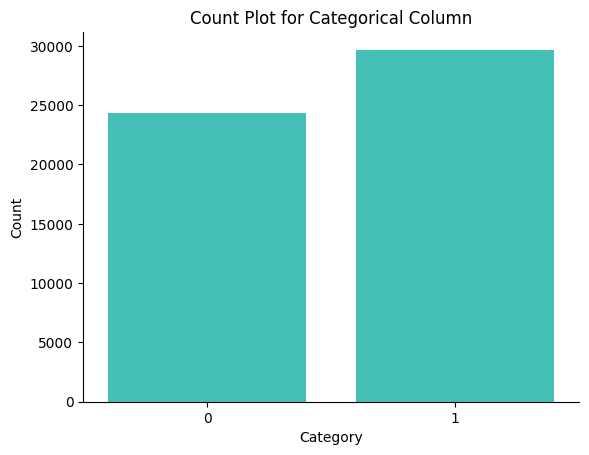

In [20]:

# Membuat count plot
sns.countplot(x='class', data=df, color='#30D5C8')
sns.despine()
plt.title('Count Plot for Categorical Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Berdasarkan *count_plot* diatas, didapatkan informasi bahwa:
- kelas `0` pada label `categori` memiliki nyaris 24000 data.
- kelas `1` pada label `categori` hanya memiliki sekitar 30000 data.

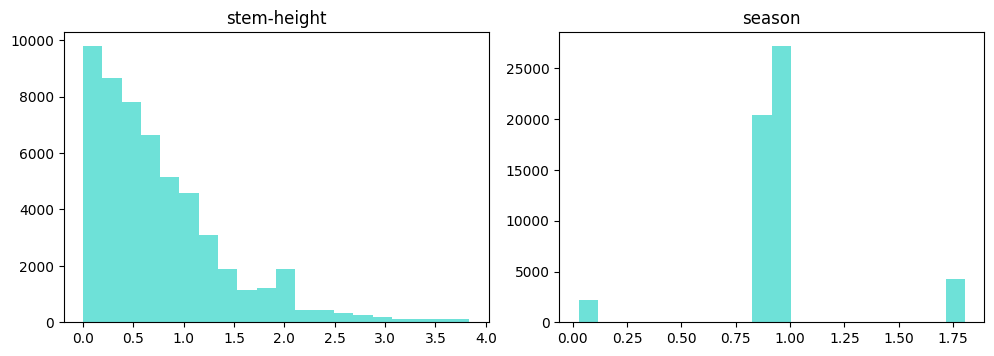

In [22]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()

# Memilih hanya 2 kolom numerikal pertama
numerical_columns = df.select_dtypes(include=['float64']).columns[:2]

for i, column in enumerate(numerical_columns):
    axs[i].hist(df[column], bins=20, color= '#30D5C8', alpha=0.7)
    axs[i].set_title(column)

# Menghapus subplot yang tidak digunakan
if len(numerical_columns) < len(axs):
    for i in range(len(numerical_columns), len(axs)):
        fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

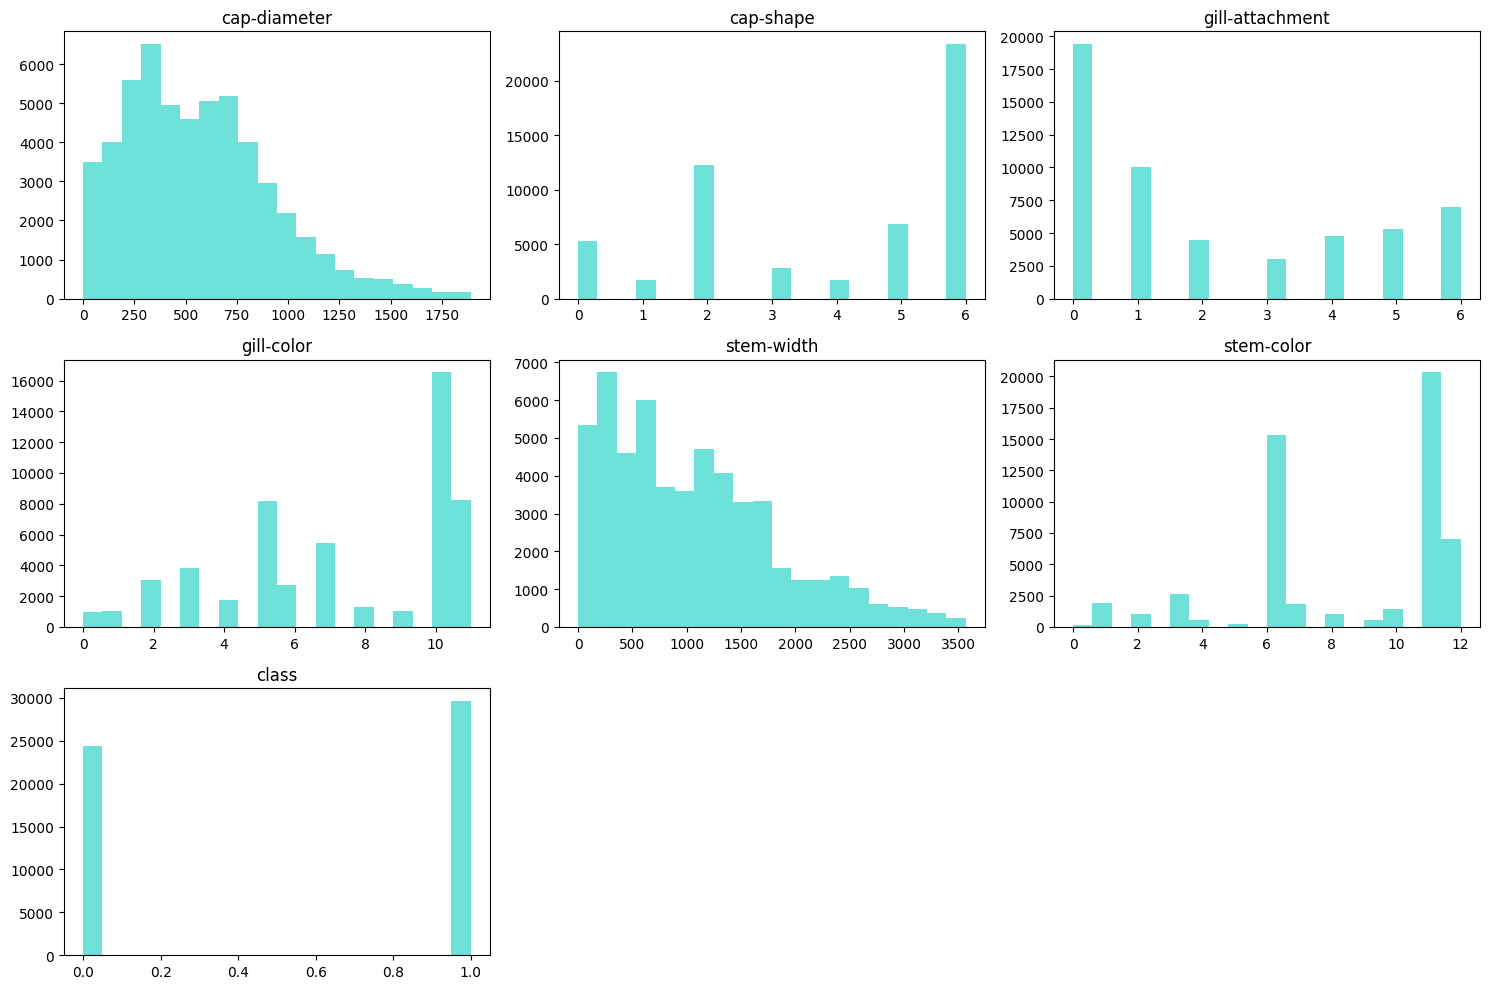

In [23]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()

# Memilih hanya 2 kolom numerikal kedua
numerical_columns = df.select_dtypes(include=['int64']).columns[:7]

for i, column in enumerate(numerical_columns):
    axs[i].hist(df[column], bins=20, color= '#30D5C8', alpha=0.7)
    axs[i].set_title(column)

# Menghapus subplot yang tidak digunakan
if len(numerical_columns) < len(axs):
    for i in range(len(numerical_columns), len(axs)):
        fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

### Multivariate Analysis

_Multivariate Analysis_ adalah prosedur statistik yang digunakan untuk memeriksa hubungan antara beberapa variabel secara bersamaan. Teknik ini mencakup berbagai metode seperti regresi berganda, analisis faktor, dan analisis kluster, yang membantu dalam memahami struktur dan pola yang kompleks dalam data dengan lebih dari satu variabel.

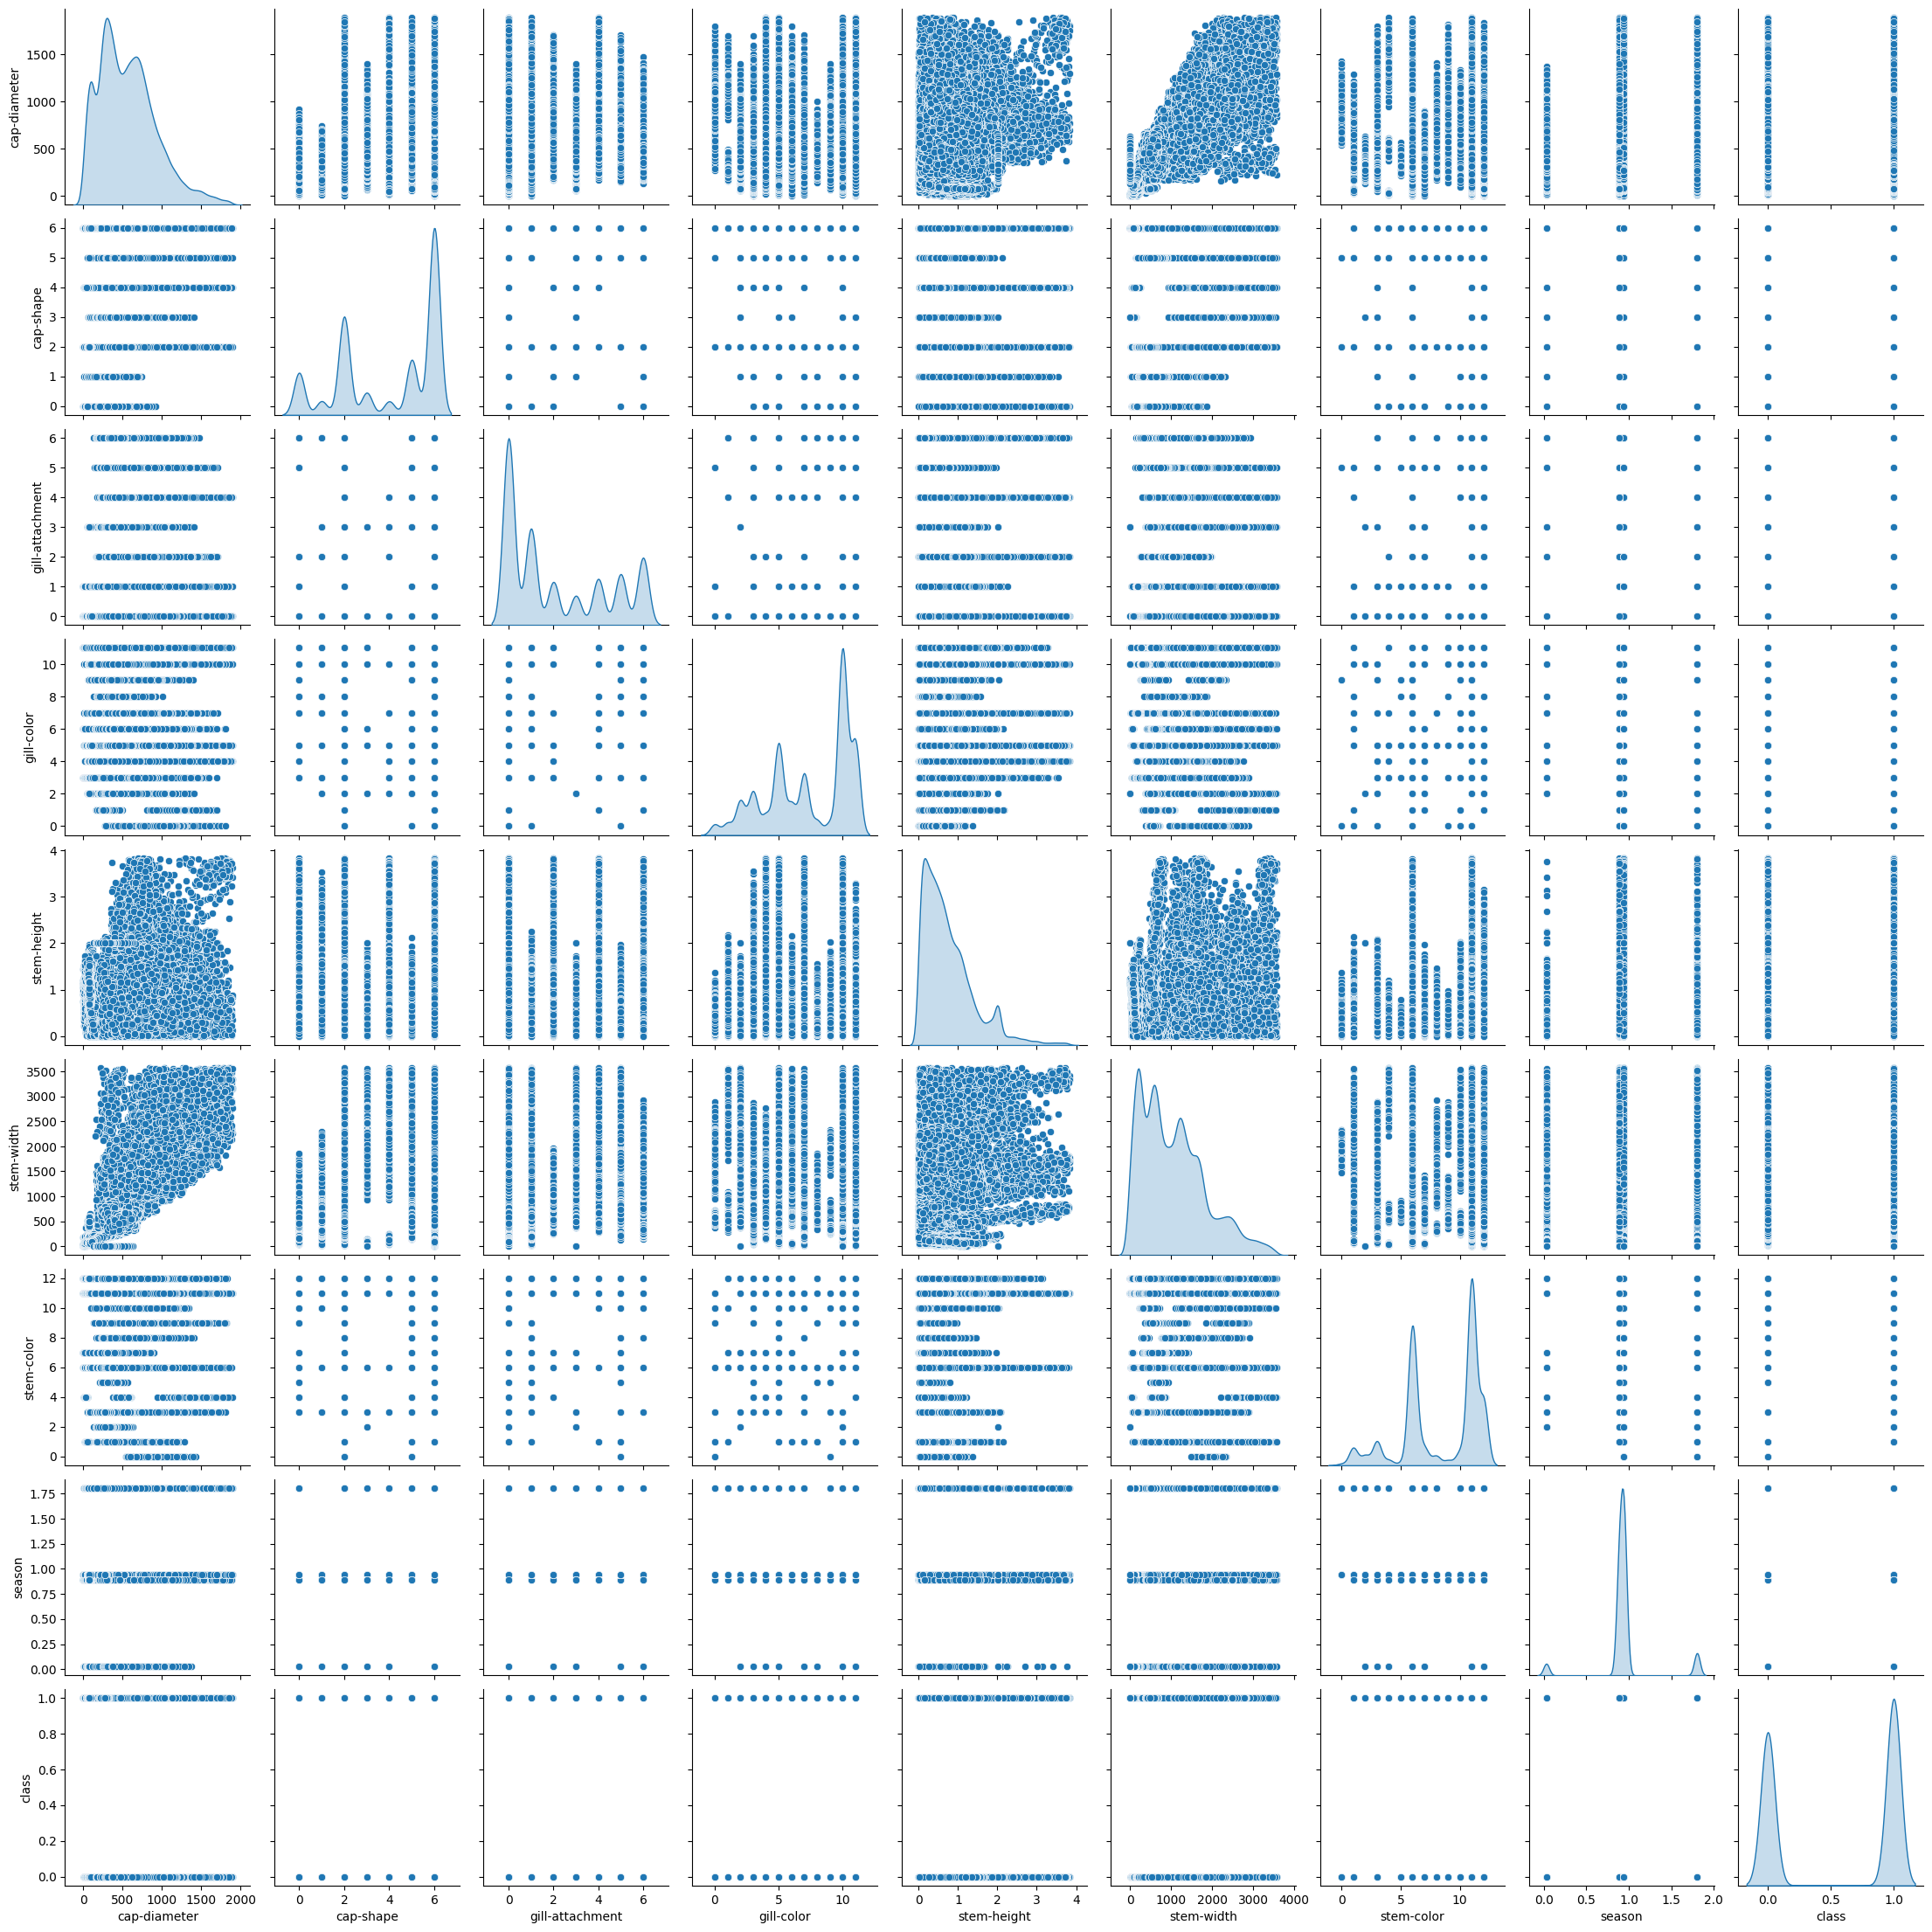

In [24]:
sns.pairplot(df, diag_kind = 'kde')

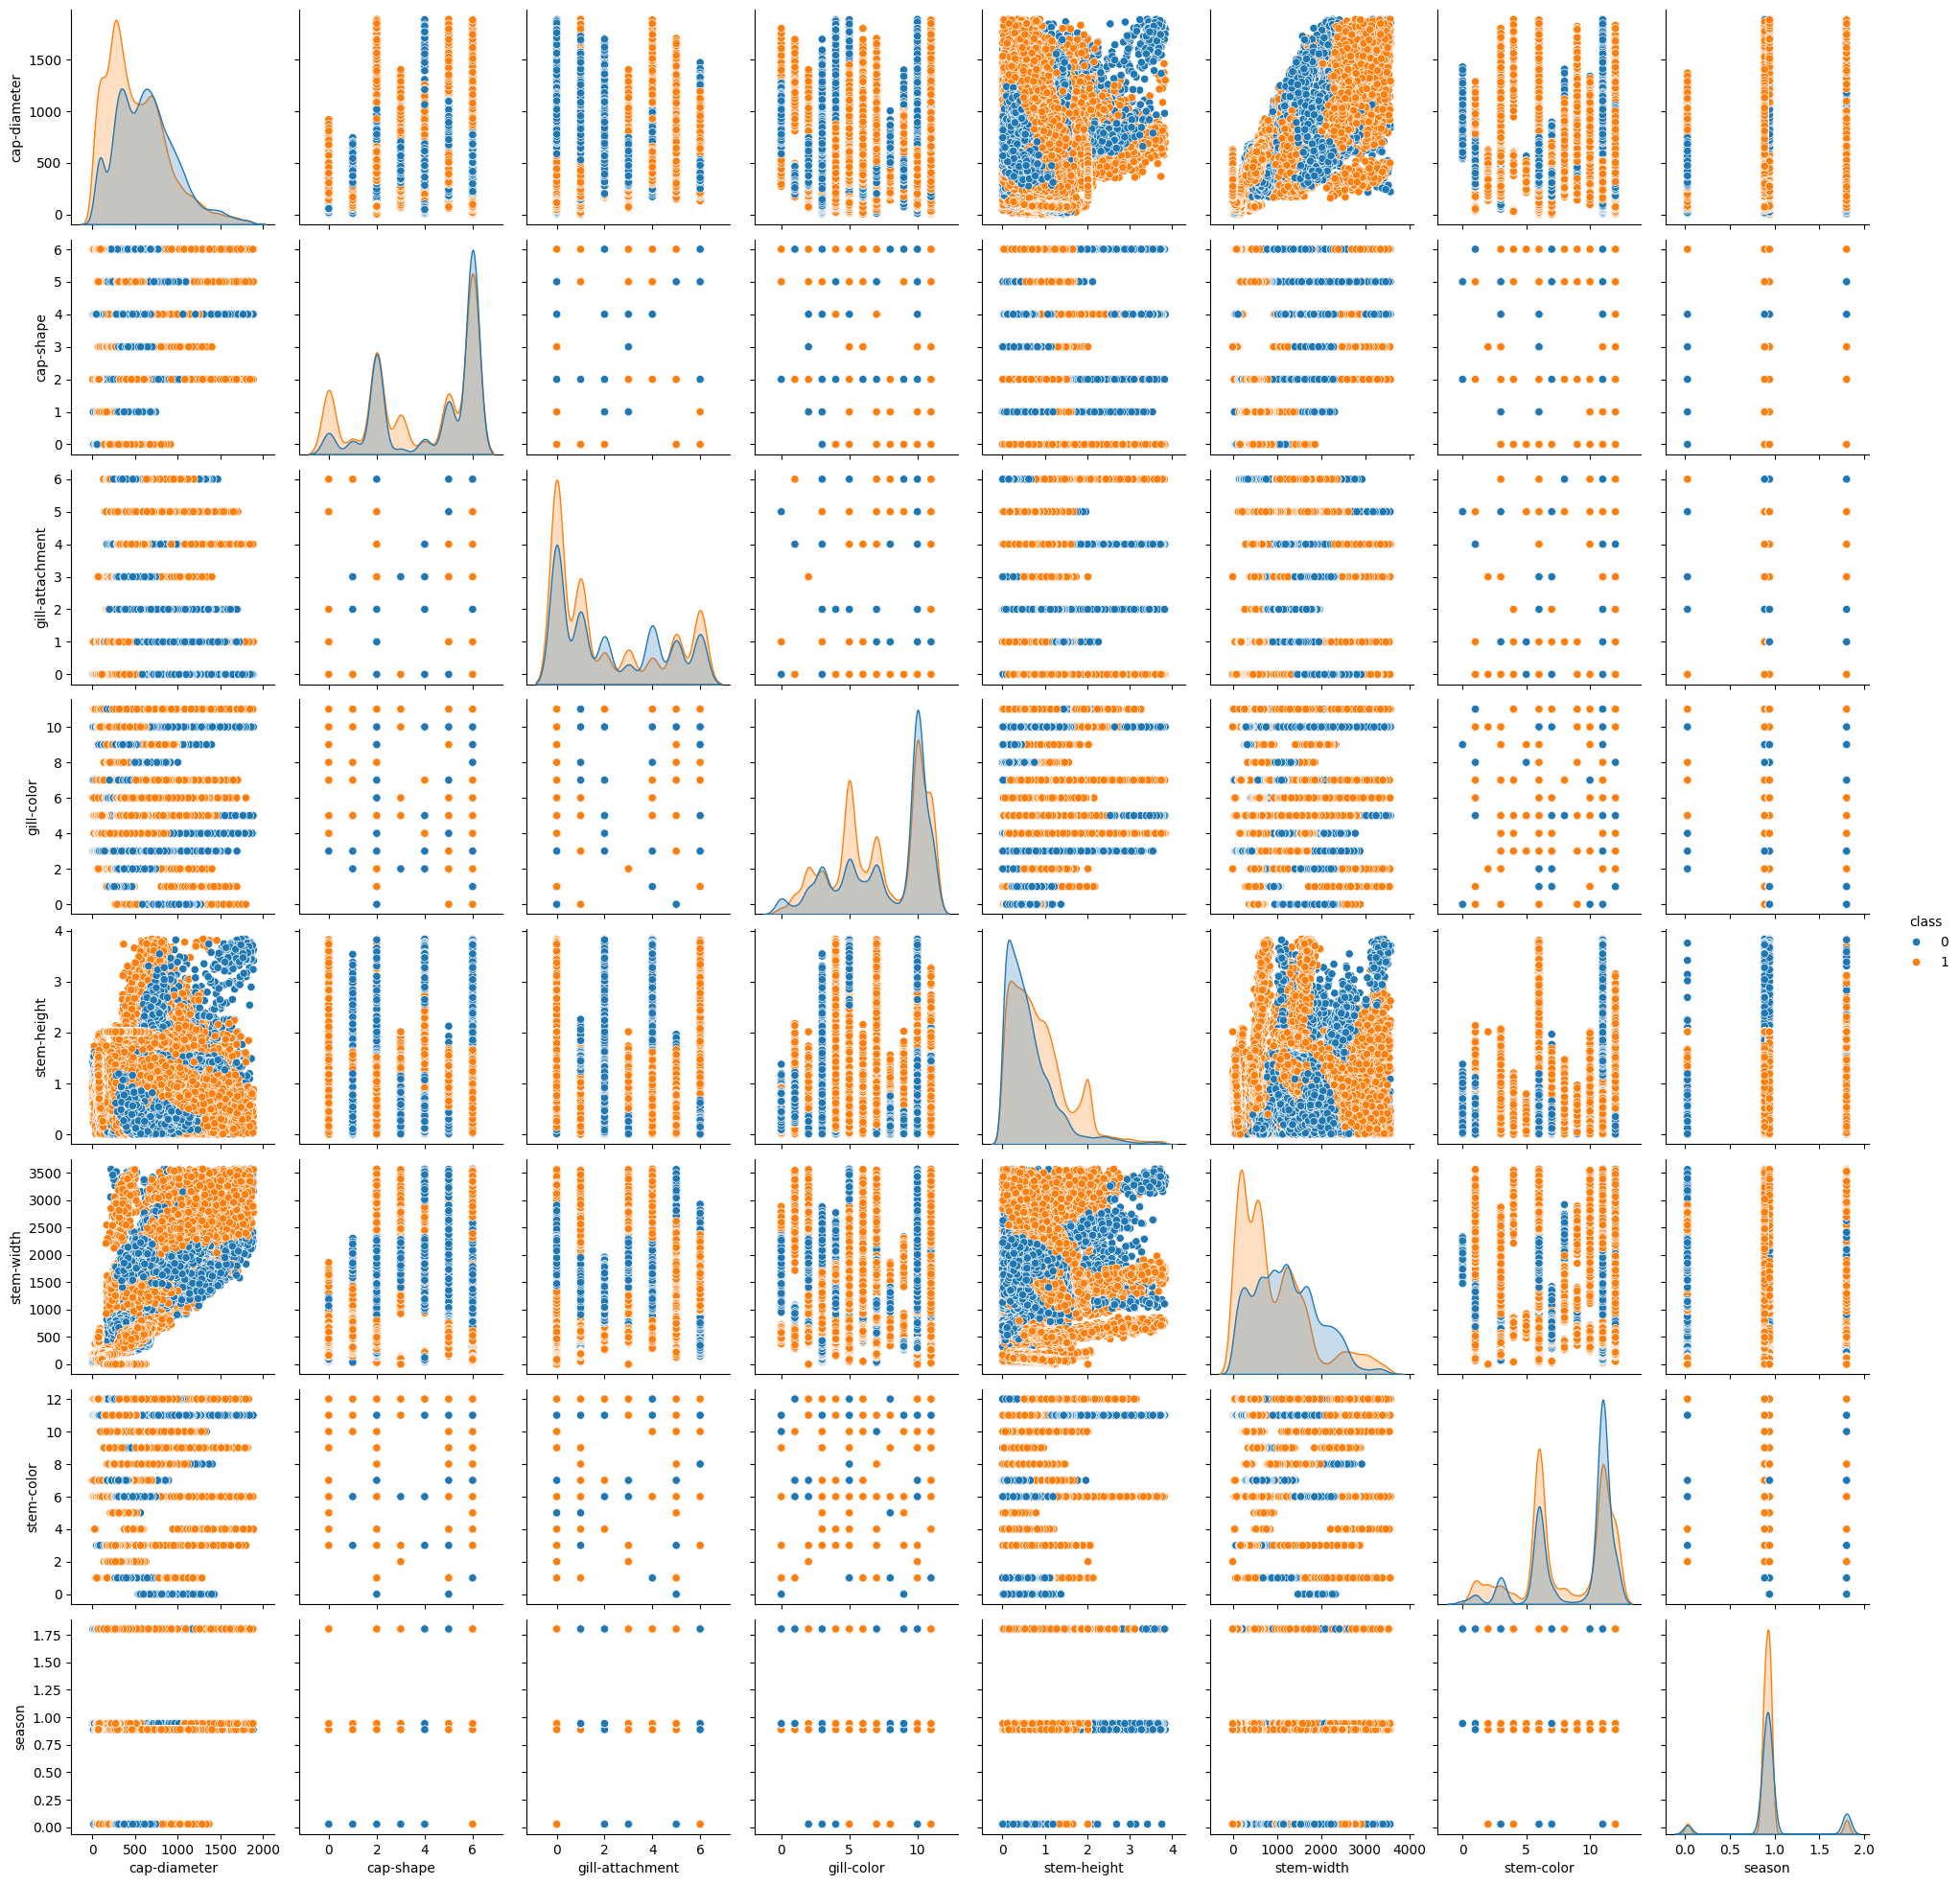

In [26]:
sns.pairplot(df, diag_kind = 'kde', hue="class")

Berdasarkan gambar kedua visualisasi data diatas, dapat terlihat nyaris semua variabel terpisah menunjukkan karakteristik atau pola khusus terhadap variabel label, yaitu ```'Class'```. ```0``` dan ```1``` (ditandai dengan warna oren dan biru) masih tidak terlihat karakterisik atau pola untuk _value_ pada label tertentu.


### Correlation

Uji Korelasi adalah metode statistik yang digunakan untuk menentukan apakah ada hubungan antara dua variabel kuantitatif dan seberapa kuat hubungan tersebut. Uji ini menghasilkan nilai koefisien korelasi, seperti Pearson atau Spearman, yang berkisar antara -1 hingga +1. Nilai mendekati +1 menunjukkan korelasi positif yang kuat, sedangkan nilai mendekati -1 menunjukkan korelasi negatif yang kuat. Nilai mendekati 0 menunjukkan tidak adanya korelasi. Uji korelasi penting dalam menentukan arah dan kekuatan hubungan antar variabel, yang dapat membantu dalam pemodelan prediktif dan analisis penyebab.

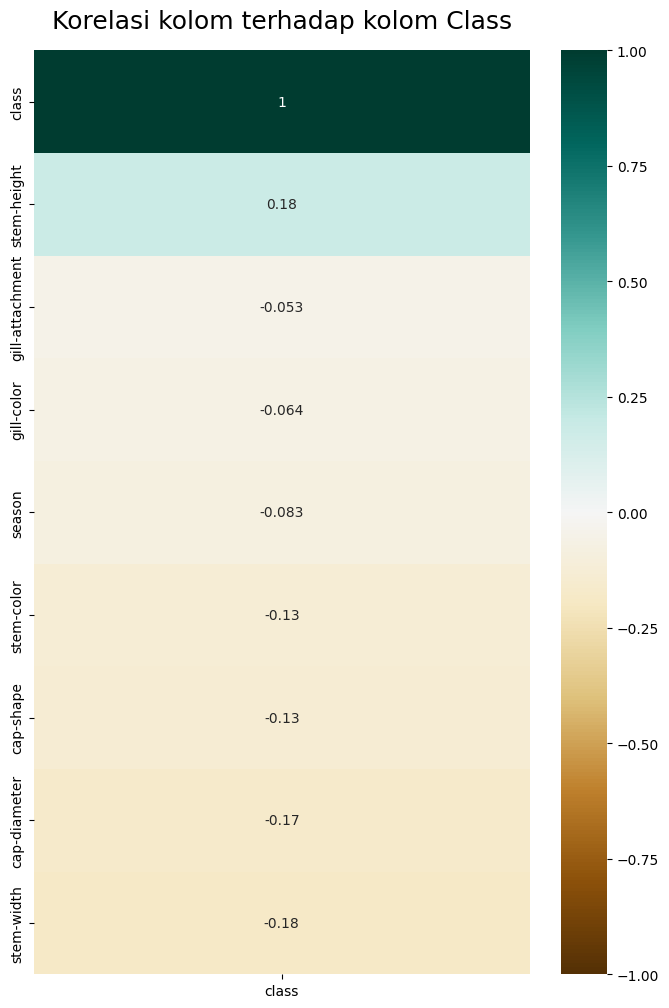

In [27]:
# Melakukan visualisasi uji korelasi kolom numeric terhadap kolom label

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['class']].sort_values(by='class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korelasi kolom terhadap kolom Class', fontdict={'fontsize':18}, pad=16);

Berdasarkan  visualisasi diatas, terlihat bahwa kolom ```season```, ```gill color```, ```gill attachement```, ```Turbidity``` memiliki skor korelasi yang paling kecil terhadap label. Kolom yang semacam ini baiknya di-drop saja untuk meringankan beban komputasi dan mengurangi dimensi dari dataset yang akan digunakan dalam pelatihan model

### Missing Value

_Missing Values_ adalah data yang hilang atau tidak tercatat dalam dataset. Hal ini bisa terjadi karena berbagai alasan, seperti kesalahan entri data, kerusakan data, atau tidak tersedianya informasi saat pengumpulan data. Missing values dapat mempengaruhi kualitas model _machine learning_ dan hasil analisis statistik. Oleh karena itu, penting untuk mengidentifikasi, menganalisis, dan mengatasi missing values dengan metode seperti imputasi, di mana nilai yang hilang diganti dengan estimasi, atau dengan menghapus baris atau kolom yang terdampak.


# Data Preparation

## Data Cleaning

Data cleaning_ adalah adalah langkah penting dalam proses Machine Learning karena melibatkan identifikasi dan penghapusan data yang hilang, duplikat, atau tidak relevan yang terdapat pada dataset. Proses ini memiliki berbagai langkah yang perlu dilakukan supaya dataset siap digunakan untuk pembangunan model Machine Learning.

**Alasan**: _Data Cleaning_ diperlukan agar data yang digunakan akurat, konsisten, dan bebas kesalahan, karena data yang salah atau tidak konsisten dapat berdampak negatif terhadap performa model Machine Learning

### Detection and Removal Duplicates

Data duplikat adalah baris data yang sama persis untuk setiap variabel yang ada. Dataset yang digunakan perlu diperiksa juga apakah dataset memiliki data yang sama atau data duplikat. Jika ada, maka data tersebut harus ditangani dengan menghapus data duplikat tersebut.

**Alasan**: Data duplikat perlu didektesi dan dihapus karena jika dibiarkan pada dataset dapat membuat model Anda memiliki bias, sehingga menyebabkan _overfitting_. Dengan kata lain, model memiliki performa akurasi yang baik pada data pelatihan, tetapi buruk pada data baru. Menghapus data duplikat dapat membantu memastikan bahwa model Anda dapat menemukan pola yang ada lebih baik lagi.

<Axes: >

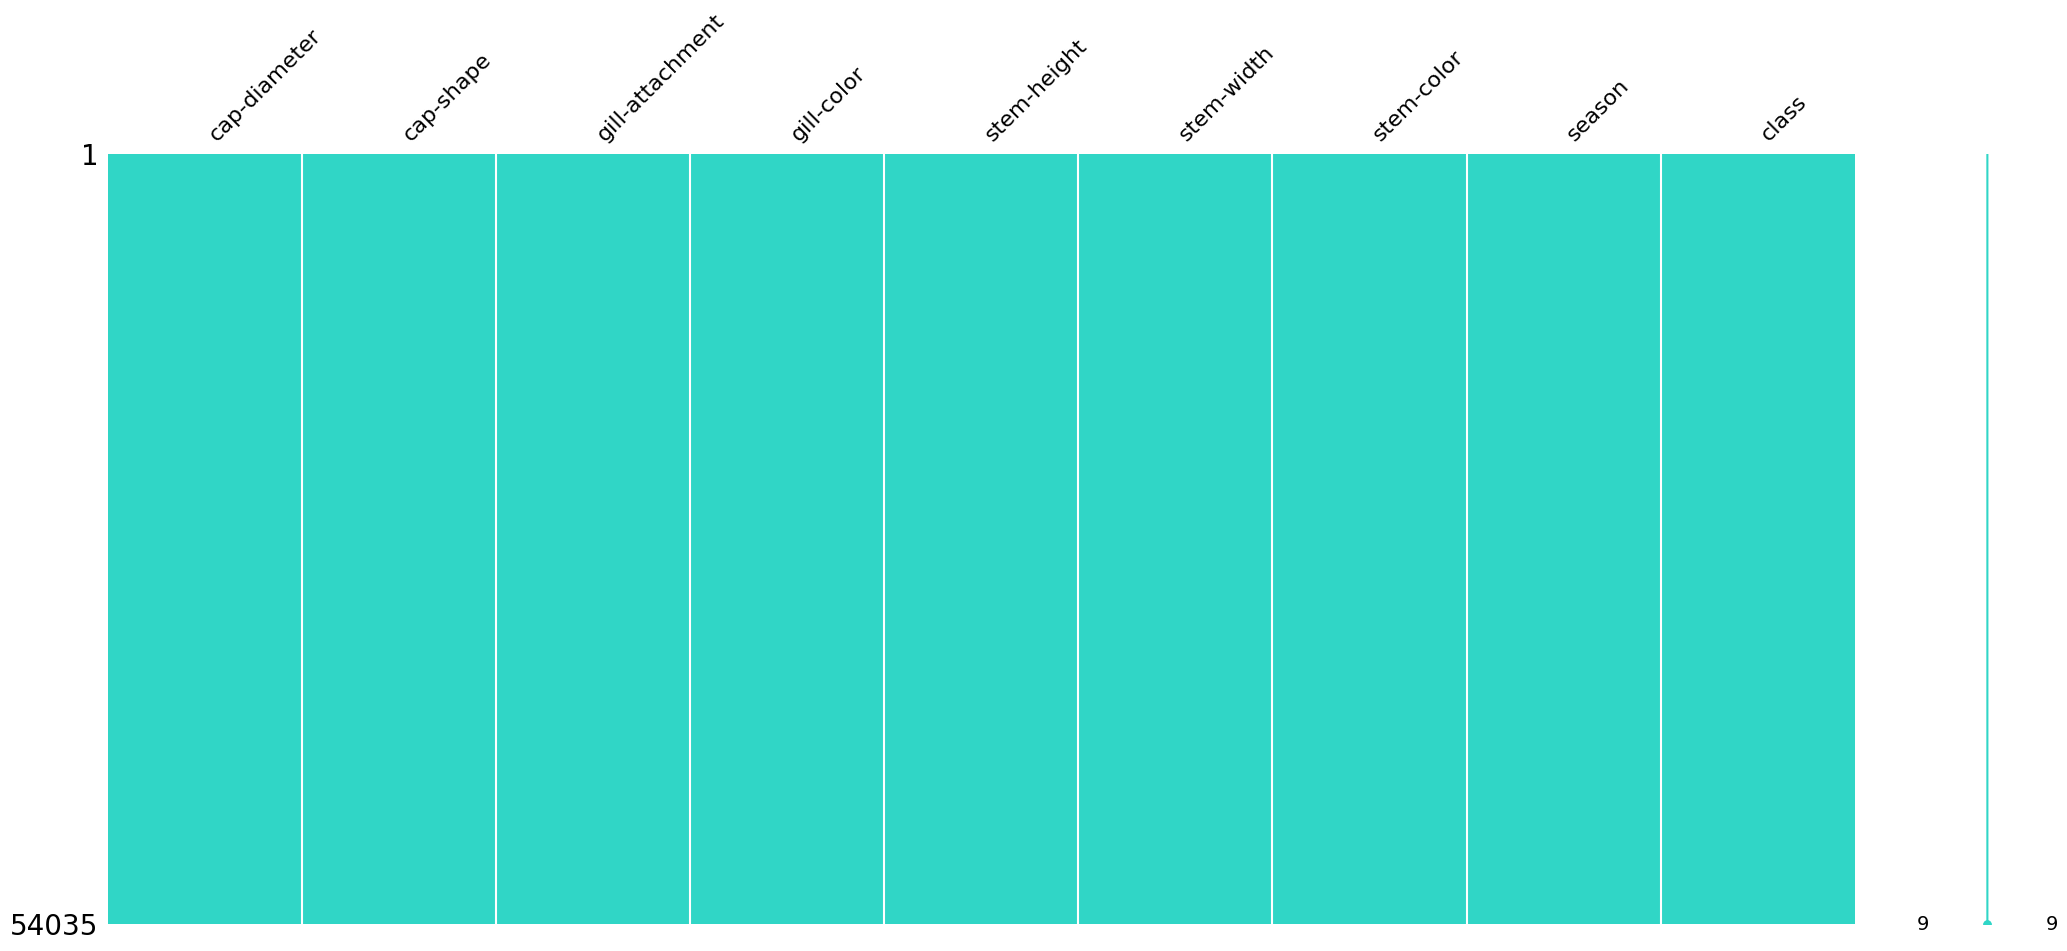

In [30]:
msno.matrix(df, color=(0.19, 0.84, 0.78))

Berdasarkan gambar diatas tidak ditemukan mising value

In [28]:
# Cek baris duplikat dalam dataset
duplicates = df.duplicated()

# Hitung jumlah baris duplikat
duplicate_count = duplicates.sum()

# Cetak jumlah baris duplikat
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 303


Berdasarkan hasil tersebut, ditemukan adanya 303 data duplikat.

In [34]:
dfclean=df.drop_duplicates()

In [36]:
# Cek baris duplikat dalam dataset
duplicates = dfclean.duplicated()

# Hitung jumlah baris duplikat
duplicate_count = duplicates.sum()

# Cetak jumlah baris duplikat
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


Data duplikat berhasil dihapus

### Dropping Column with Low Correlation

ada bagian ini adalah proses penghapusan fitur-fitur yang memiliki korelasi rendah terhadap variabel target dari dataset. Langkah ini diambil berdasarkan asumsi bahwa fitur dengan korelasi rendah tidak memberikan kontribusi signifikan terhadap prediksi yang dibuat oleh model.

**Alasan**: Tahapan ini perlu dilakukan karena fitur dengan korelasi rendah terhadap variabel target cenderung tidak memberikan informasi yang berguna untuk prediksi dan dapat menambahkan kebisingan yang tidak perlu ke dalam model. Dengan menghilangkan fitur-fitur ini, kita dapat mengurangi kompleksitas model, yang dapat membantu dalam mencegah _overfitting_ dan mempercepat waktu pelatihan. Selain itu, model yang lebih sederhana dengan fitur yang lebih sedikit lebih mudah untuk diinterpretasikan, yang memungkinkan kita untuk lebih memahami bagaimana fitur-fitur tersebut mempengaruhi variabel target.


In [37]:
# Mendefinisikan daftar fitur dengan korelasi rendah terhadap variabel target
low_corr = ['season', 'gill-attachment', 'gill-color']

# Menghapus fitur-fitur tersebut dari dataset
# Axis=1 menunjukkan bahwa operasi penghapusan dilakukan pada kolom (fitur)
dfclean = dfclean.drop(low_corr, axis=1)


In [38]:
dfclean

,cap-diameter,cap-shape,stem-height,stem-width,stem-color,class
0,1372,2,3.807467,1545,11,1
1,1461,2,3.807467,1557,11,1
2,1371,2,3.612496,1566,11,1
3,1261,6,3.787572,1566,11,1
4,1305,6,3.711971,1464,11,1
...,...,...,...,...,...,...
54030,73,5,0.887740,569,12,1
54031,82,2,1.186164,490,12,1
54032,82,5,0.915593,584,12,1
54033,79,2,1.034963,491,12,1


Penghapusan kolom dengan korelasi rendah sudah berhasil dilakukan. Berdasarkan dataframe diatas, tersisa 6 kolom. 1 kolom label dan 5 kolom numerik.

### Handle Missing Value

_Missing Value_ terjadi ketika variabel atau barus tertentu kekurangan titik data, sehingga menghasilkan informasi yang tidak lengkap. Nilai yang hilang dapat ditangani dengan berbagai cara seperti imputasi (mengisi nilai yang hilang dengan mean, median, modus, dll), atau penghapusan (menghilangkan baris atau kolom yang nilai hilang)

**Alasan**: _Missing Value_ perlu ditangani karena jika dibiarkan dapat berpengaruh ke rendahnya akurasi model yang akan dibuat. Maka dari itu, penting untuk mengatasi missing value secara efisien untuk mendapatkan model _Machine Learning_ yang baik juga.

In [39]:
dfclean.isnull().sum()

,0
cap-diameter,0
cap-shape,0
stem-height,0
stem-width,0
stem-color,0
class,0


Berdasarkan output diatas, tidak ada mising value

In [40]:
dfclean.shape

(53732, 6)

Berdasarkan output diatas, kini dataframe memiliki:
- 6 Kolom
- 53732 baris data

### Outliers Detection and Removal


_Outliers_ adalah titik data yang secara signifikan berbeda dari sebagian besar data dalam kumpulan data. Outliers dapat muncul karena variasi dalam pengukuran atau mungkin menunjukkan kesalahan eksperimental; dalam beberapa kasus, outliers bisa juga menunjukkan variabilitas yang sebenarnya dalam data. Penting untuk menganalisis outliers karena mereka dapat memiliki pengaruh besar pada hasil analisis statistik.

Outliers adalah titik data yang secara signifikan berbeda dari sebagian besar data dalam kumpulan data. Outliers dapat muncul karena variasi dalam pengukuran atau mungkin menunjukkan kesalahan eksperimental; dalam beberapa kasus, outliers bisa juga menunjukkan variabilitas yang sebenarnya dalam data. Penting untuk menganalisis outliers karena mereka dapat memiliki pengaruh besar pada hasil analisis statistik.

Proses pembersihan outliers menggunakan metode IQR (Interquartile Range) melibatkan beberapa langkah:

- Menghitung Kuartil: Tentukan kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data. Kuartil ini membagi data menjadi empat bagian yang sama.

- Menghitung IQR: Hitung IQR dengan mengurangi Q1 dari Q3:
  $$IQR=Q3−Q1$$

- Menentukan Batas Outliers:

  - Batas bawah untuk outliers:
    $$Q1−1.5×IQR$$

  - Batas atas untuk outliers:
    $$Q3+1.5×IQR$$

- Identifikasi Outliers: Data yang berada di luar batas bawah dan atas ini dianggap sebagai outliers.

Pembersihan Outliers yang teridentifikasi kemudian dapat dibersihkan dari dataset, baik dengan menghapusnya atau melakukan transformasi tertentu.
    
**Alasan**:_Outliers_ perlu dideteksi dan dihapus karena jika dibiarkan dapat merusak hasil analisis statistik pada kumpulan data sehingga menghasilkan performa model yang kurang baik. Selain itu, Mendeteksi dan menghapus _outlier_ dapat membantu meningkatkan performa model _Machine Learning_ menjadi lebih baik.

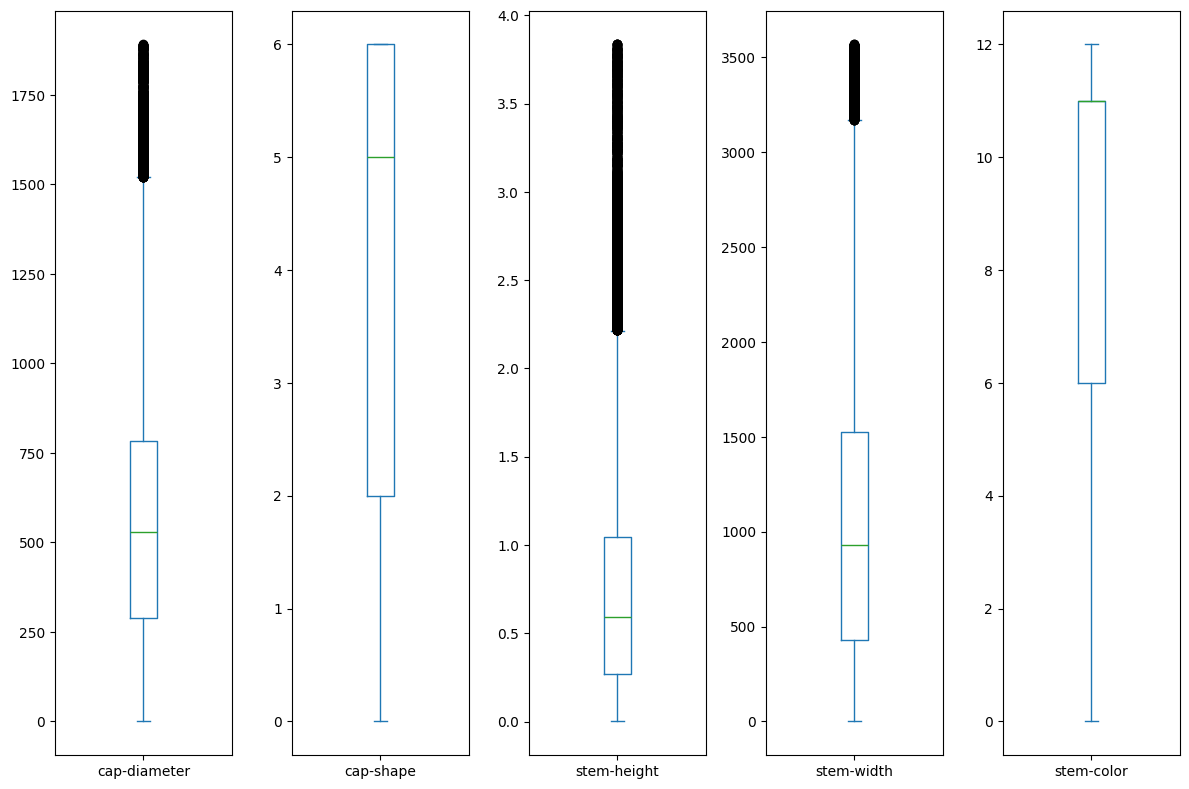

In [41]:
feature_columns = dfclean.select_dtypes(include=[np.number]).drop('class', axis=1)

feature_columns.plot(kind='box', subplots=True, layout=(1, len(feature_columns.columns)), figsize=(12, 8))
plt.tight_layout()
plt.show()

Berdasarkan boxplots diatas, semua kolom numerik memiliki outliers-nya masing-masing. Outliers perlu dihapus untuk mendapatkan model dengan performa yang bagus.

In [43]:
# Assuming 'df' is your DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for what is considered an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = dfclean[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


<ipython-input-43-1408ccb32c7b>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = dfclean[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


Outliers yang berada pada setiap kolom sudah dihapus.

In [44]:
df.shape

(44674, 6)

Berdasarkan output diatas, kini dataframe memiliki:
- 6 Kolom
- 44674 baris data

### Imbalance Data

_Imbalance data_ adalah kondisi di mana kelas atau kategori dalam dataset tidak diwakili secara merata, dengan satu kelas mendominasi yang lain. Jika hal ini dibiarkan hingga proses pelatihan model dapat mengakibatkan bias pada model. Hal ini bisa diatasi dengan _oversampling_ atau _undersampling_.

**Alasan**: Hal ini dapat menjadi masalah adalah karena _imbalance_ _data_ dapat menyebabkan model bias terhadap kelas mayoritas (lebih banyak) dan menghasilkan performa yang buruk pada kelas minoritas lebih sedikit)

In [46]:
count_0 = df[df['class'] == 0].shape[0]
count_1 = df[df['class'] == 1].shape[0]
print("Jumlah baris data yang bernilai '0' ada sebanyak: " + str(count_0))
print("Jumlah baris data yang bernilai '1' ada sebanyak: " + str(count_1))

Jumlah baris data yang bernilai '0' ada sebanyak: 19190
Jumlah baris data yang bernilai '1' ada sebanyak: 25484


Berdasarkan output diatas, dataset memiliki ketidakseimbangan jumlah kelas. Hal ini jika dibiarkan data mengakitbatkan bias-nya model.

Untuk mengatasinya, dilakukan undersampling untuk kelas `0` agar menyesuaikanjumlah dengan kelas `1`.

In [48]:
# Melakukan undersampling

df = df.groupby('class').apply(lambda x: x.sample(min(len(x), min(count_0, count_1)))).reset_index(drop=True)

<ipython-input-48-32b05e8eae8b>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('class').apply(lambda x: x.sample(min(len(x), min(count_0, count_1)))).reset_index(drop=True)


Proses undersampling sudah dilakukan.

In [49]:
count_0 = df[df['class'] == 0].shape[0]
count_1 = df[df['class'] == 1].shape[0]
print("Jumlah baris data yang bernilai '0' ada sebanyak: " + str(count_0))
print("Jumlah baris data yang bernilai '1' ada sebanyak: " + str(count_1))

Jumlah baris data yang bernilai '0' ada sebanyak: 19190
Jumlah baris data yang bernilai '1' ada sebanyak: 19190


Berdasarkan output diatas, dataset memiliki sudah jumlah kelasnya sudah seimbang. `0` dan `1` sudah memiliki jumlah baris data yang sama.

## Train Test Split

Train Test Split adalah metode yang digunakan untuk membagi dataset menjadi dua bagian: satu untuk melatih model (_training set_) dan satu lagi untuk menguji model (_testing set_). Biasanya, data dibagi dengan proporsi tertentu, misalnya 80% untuk training dan 20% untuk testing.

**Alasan**: Proses ini dilakukan agar dapat mengevaluasi kinerja model secara objektif. Dengan memisahkan data uji, kita dapat mengukur seberapa baik model memprediksi data baru yang tidak pernah dilihat sebelumnya, yang merupakan indikator penting dari kemampuan generalisasi model.

In [50]:
X = df.drop(["class"], axis =1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Proses `train test split` berhasil dilakukan. Dataset dibagi menjadi 80% untuk train dan 20% untuk test.

In [51]:
train_count = X_train.shape
test_count = X_test.shape
print("Dataset training memiliki data sebanyak " + str(train_count[0]) + " baris")
print("Dataset test memiliki data sebanyak " + str(test_count[0]) + " baris")

Dataset training memiliki data sebanyak 30704 baris
Dataset test memiliki data sebanyak 7676 baris


Berdasarkan output diatas, terlihat bahwa:
- `X_train` memiliki 30704 baris data
- `X_test` memiliki 7676 baris data

In [53]:
train_count_label = y_train.shape
test_count_label = y_test.shape
print("Dataset label training memiliki data sebanyak " + str(train_count_label[0]) + " baris")
print("Dataset label test memiliki data sebanyak " + str(test_count_label[0]) + " baris")

Dataset label training memiliki data sebanyak 30704 baris
Dataset label test memiliki data sebanyak 7676 baris


Berdasarkan informasi tersebut, bisa dipastikan proses `train test split` sukses dilakukan.

## Data Transformation

_Data Transformation_ adalah proses mengubah data dari satu format atau struktur ke format atau struktur lainnya. Proses ini biasanya dari format sistem sumber menjadi yang dibutuhkan oleh sistem tujuan. _Data Transformation_ dapat dilakukan dengan berbagai cara, seperti mengubah satuan ukuran data, mengubah distribusi data, atau mengubah bentuk data.
    
**Alasan**: Data Tranformasi perlu dilakukan karena dapat meningkatkan efisiensi dan meningkatkan kualitas data yang digunakan dalam pembuatan model _Machine Learning._

### Standardization

Standardisasi adalah proses mengubah data menjadi format yang lebih seragam dan dapat dibandingkan. Ini biasanya melibatkan pengurangan rata-rata (mean) dan pembagian dengan simpangan baku (standard deviation) untuk setiap fitur, sehingga fitur tersebut akan memiliki rata-rata nol dan varians satu.

**Alasan**: Standardisasi perlu dilakukan karena banyak algoritma _machine learning_ yang berperforma lebih baik jika fitur-fitur berada pada skala yang sama. Standardisasi membantu dalam hal ini dengan memastikan bahwa setiap fitur berkontribusi secara proporsional ke hasil akhir dan menghindari bias terhadap fitur dengan skala yang lebih besar.

In [54]:
scaler = StandardScaler()

`StandardScaler` berhasil diinisiasikan ke variabel `scaler`.

In [55]:
X_train[:] = scaler.fit_transform(X_train[:])
X_train.head()

<ipython-input-55-54117e05fb1d>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.18067133  0.86482207  0.4952585  ... -1.28231173  0.37919721
  0.48915001]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train[:] = scaler.fit_transform(X_train[:])
<ipython-input-55-54117e05fb1d>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.88084869  0.88084869  0.88084869 ... -0.99253543  0.88084869
  0.41250266]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train[:] = scaler.fit_transform(X_train[:])
<ipython-input-55-54117e05fb1d>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.40292099  1.86516902 -0.07173531 ... -1.17630959 -0.77361498
  0.88962716]' has dtype incompatible with int

,cap-diameter,cap-shape,stem-height,stem-width,stem-color
7249,0.180671,0.880849,-0.166586,1.402921,0.759369
13287,0.864822,0.880849,-0.536906,1.865169,-0.771293
20729,0.495258,0.880849,0.016321,-0.071735,-0.159029
31434,-0.833338,0.880849,0.646653,-1.180563,-0.771293
20205,-1.587736,0.880849,0.709686,-1.389000,0.759369


In [56]:
X_train.describe().round(4)

,cap-diameter,cap-shape,stem-height,stem-width,stem-color
count,30704.0000,30704.0000,30704.0000,30704.0000,30704.0000
mean,-0.0000,-0.0000,0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.6702,-1.9292,-1.3074,-1.4301,-2.6081
25%,-0.7875,-0.9925,-0.8048,-0.8133,-0.7713
50%,-0.0973,0.4125,-0.2122,-0.1398,0.7594
75%,0.6602,0.8808,0.5994,0.6500,0.7594
max,2.9692,0.8808,3.1033,3.0733,1.0655


Berdasarkan output diatas, terlihat nilai-nilai dari kolom numerik pada dataset `train` sudah berubah skalanya. Kemudian, `mean` dan `std` nya sudah bernilai 0 dan 1. Maka dari itu, dapat dipastikan proses standardisasi berhasil dilakukan.

In [57]:
X_test[:] = scaler.fit_transform(X_test[:])
X_test.head()

<ipython-input-57-b5b20aa463fa>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.08230167 -0.39856856  1.24903133 ... -1.09134366  1.89963751
  0.48396667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test[:] = scaler.fit_transform(X_test[:])
<ipython-input-57-b5b20aa463fa>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.98503343 -0.98503343  0.42282095 ... -0.98503343  0.42282095
  0.42282095]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test[:] = scaler.fit_transform(X_test[:])
<ipython-input-57-b5b20aa463fa>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.74243525  0.09356072  0.91799654 ... -0.52581951  1.9685553
  0.23120077]' has dtype incompatible with int64, p

,cap-diameter,cap-shape,stem-height,stem-width,stem-color
10075,-0.082302,-0.985033,0.217104,0.742435,0.754490
15714,-0.398569,-0.985033,0.582771,0.093561,-0.774731
5384,1.249031,0.422821,-1.322594,0.917997,0.754490
27341,-0.211820,0.892106,0.670416,0.214347,0.754490
18399,0.697823,-0.985033,-0.144092,1.387096,0.754490


In [58]:
X_test.describe().round(4)

,cap-diameter,cap-shape,stem-height,stem-width,stem-color
count,7676.0000,7676.0000,7676.0000,7676.0000,7676.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001
min,-1.6365,-1.9236,-1.3226,-1.4191,-2.6098
25%,-0.7992,-0.9850,-0.8006,-0.8281,-0.7747
50%,-0.0883,0.4228,-0.2128,-0.1438,0.7545
75%,0.6737,0.8921,0.6157,0.6455,0.7545
max,2.9237,0.8921,3.0525,3.0205,1.0603


Berdasarkan output diatas, terlihat nilai-nilai dari kolom numerik pada dataset `test` sudah berubah skalanya. Kemudian, `mean` dan `std` nya sudah bernilai 0 dan 1. Maka dari itu, dapat dipastikan proses standardisasi berhasil dilakukan.

# Modelling

Pada bagian ini, data yang yang sudah dibagi menjadi dua bagian menjadi _training dataset_ dan _test dataset_ siap untuk digunakan untuk pembangunan model _Machine Learning_-nya. Untuk kasus ini, digunakan 3 (tiga) _baseline model_ dari 3 algoritma yang berbeda. Berikut ini adalah ketiga algoritma tersebut:
- Random Forest
  - Kelebihan
    - Akurasi tinggi
    - Dapat menangani data dengan dimensi tinggi
    - _Robust_ terhadap _noise_ dan _outliers_
  - Kekurangan
    - Mahal secara komputasi
    - Butuh waktu lebih lama
    - Interpretabilitas
- KNN
  - Kelebihan
    - Sederhana dan Mudah Dipahami
    - Non-parametric
    - Tidak perlu pelatihan
  - Kekurangan
    - Sensitif terhadap _outliers_
    - Mahal secara komputasi
    - Memerlukan pilihan K yang baik
- SVM
  - Kelebihan
    - Efektif untuk data dengan dimensi tinggi
    - Serbaguna
    - Robust
  - Kekurangan
    - Sensitif terhadap pilihan Kernel
    - Membutuhkan penyetelan Hyperparameter
    - _Training Cost_

Kemudian, _baseline model_ dari ketiga algoritma tersebut yang memiliki akurasi tertinggi digunakan untuk ke tahap selanjutnya. Selanjutnya, algoritma tersebut digunakan kembali untuk pembangunan model, tetapi dengan memanfaatkan _hyperparameter_ yang ada sehingga mendapatkan hasil terbaik. Untuk menemukan _hyperparamter_ yang memberikan hasil terbaik, ```GridSearch``` digunakan ke model yang terpilih.

## Baseline Model

In [59]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5) #default
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print(f'KNN Accuracy: {accuracy_score(y_test, knn_predictions)}')

KNN Accuracy: 0.9076341844710787


Berdasarkan hasil tersebut, Algoritma KNN memiliki akurasi test sebesar 90%

In [60]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
print(f'SVM Accuracy: {accuracy_score(y_test, svm_predictions)}')

SVM Accuracy: 0.6584158415841584


Berdasarkan hasil tersebut, Algoritma SVM memiliki akurasi test sebesar 65%

In [61]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)}')

Random Forest Accuracy: 0.9133663366336634


Berdasarkan hasil tersebut, Algoritma Random Forest memiliki akurasi test sebesar 91%

In [62]:
eval = pd.DataFrame(columns=['train', 'test'], index = ['KNN', 'SVM', 'RF'])

model_dict = {'KNN': knn, 'SVM': svm, 'RF': random_forest}

for name, model in model_dict.items():
    eval.loc[name, 'train'] = metrics.accuracy_score(y_true=y_train, y_pred=model.predict(X_train))/1e3
    eval.loc[name, 'test'] = metrics.accuracy_score(y_true=y_test, y_pred=model.predict(X_test))/1e3

In [63]:
eval

,train,test
KNN,0.000934,0.000908
SVM,0.000645,0.000658
RF,0.001,0.000913


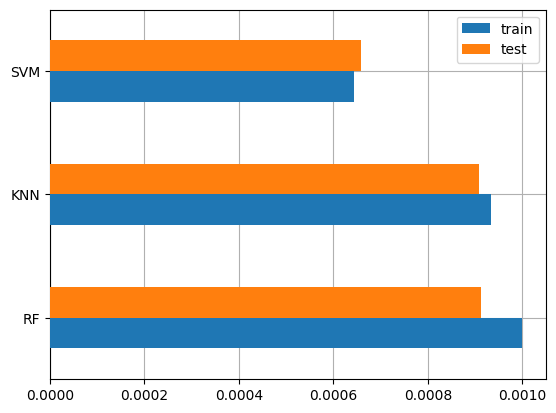

In [64]:
fig, ax = plt.subplots()
eval.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [65]:
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

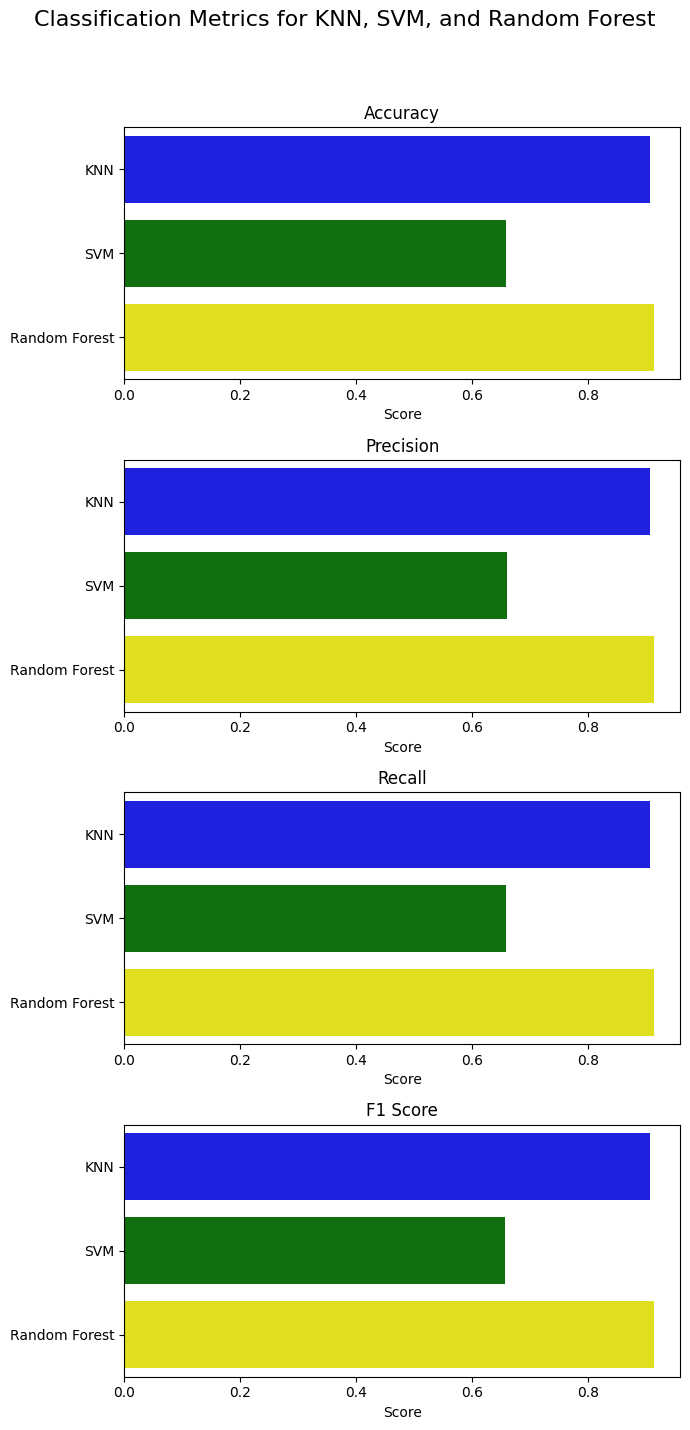

In [70]:
y_true = y_test

models = {
    'KNN': knn_predictions,
    'SVM': svm_predictions,
    'Random Forest': rf_predictions
}

# Define a function to calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred, average='weighted')
    recall = metrics.recall_score(y_true, y_pred, average='weighted')
    f1 = metrics.f1_score(y_true, y_pred, average='weighted')
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Calculate metrics for each model
model_metrics = {model: calculate_metrics(y_true, predictions) for model, predictions in models.items()}

colors = ['blue', 'green', 'yellow']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(7, 15))
fig.suptitle('Classification Metrics for KNN, SVM, and Random Forest', fontsize=16)

# Metrics to plot
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting each metric in its own subplot
for i, metric in enumerate(metrics_list):
    values = [model_metrics[model][metric] for model in models]
    sns.barplot(x=values, y=list(models.keys()), ax=axes[i], palette=colors)
    axes[i].set_title(metric)
    axes[i].set_xlabel('Score')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Berdasarkan visualisasi data diatas, terlihat bahwa baseline model dengan algoritma `Random Forest` memiliki performa yang terbaik pada `Accuracy`, `Precision`, `Recall`, dan `F1 Score`  dibandingkan dengan baseline model algoritma `KNN` dan `SVM` baik pada proses `train` maupun `test` nya.

Maka dari itu, Algoritma `Random Forest` akan digunakan ketahap selanjutnya yaitu, tuning hyperparameter.

## Hyperparameter Tuning

In [71]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score (accuracy): {best_score}")

Fitting 3 folds for each of 225 candidates, totalling 675 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best cross-validation score (accuracy): 0.8838588238603743


Berdasarkan hasil dari proses `GridSearch`, kombinasi parameter yang terbaik adalah:

- `max_depth`: 10
- `min_samples_leaf`: 1
- `min_samples_split`: 2,
- `n_estimators`: 400

# Evaluasi

In [72]:
# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")


Test Accuracy: 0.8823606044815008


Hasil diatas menujukkan bahwa `Accuracy` model menggunakan dataset `test` sebesar 88%.

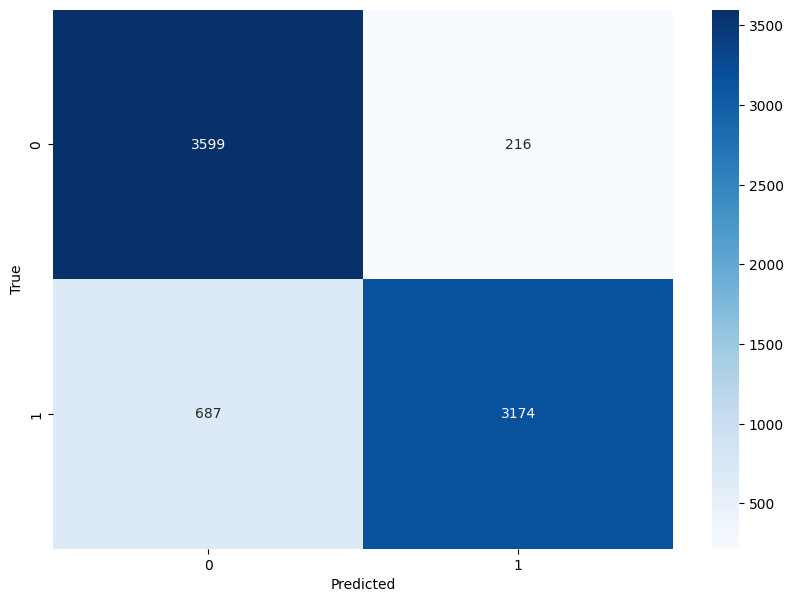

In [73]:
# Plot the confusion matrix
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d',  cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Berdasarkan visualisasi data diatas, hasilnya dapat dirincikan sebagai berikut:
- True Positive (TP): 3599
- True Negative (TN): 3174
- False Positive (FP): 687
- False Negative (FN): 216

In [74]:
# Calculate and print the evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

# For a more comprehensive report
classification_report = metrics.classification_report(y_test, y_pred)
print(f"Classification Report :\n{classification_report}")

Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3815
           1       0.94      0.82      0.88      3861

    accuracy                           0.88      7676
   macro avg       0.89      0.88      0.88      7676
weighted avg       0.89      0.88      0.88      7676



Berdasarkan output diatas, berikut ini adalah hasil akhir dari model yang dibangun dengan algoritma `Random Forest` dengan hyperparameter tuning:
- `Accuracy` : 0.88
- `Precision`: 0.88
- `Recall`: 0.88
- `F1-Score`: 0.88